# A Naive Prediction Of The Future

## Baseline model

#### A baseline model is a trivial solution to your forecasting problem. It relies on heuristics or simple statistics and is usually the simplest solution. It does not require model fitting, and it is easy to implement.

#### You might wonder if those baseline models are any good. How well can those simple methods forecast the future? We can answer this question by forecasting for the year of 1980 and testing our forecasts against the observed data in 1980. This is called out-of-sample forecasting because we are making predictions for a period that was not taken into account when the model was developed. That way we can measure the performance of our models and see how they would perform when we forecast beyond the data we have, which in this case is 1981 and later.

In [3]:
import pandas as pd

df = pd.read_csv("/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/Data/jj.csv")
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [4]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [5]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [7]:
df.sort_values(by="date", ascending=True, inplace=True)

In [8]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [9]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [6]:
train = df[:-4]
test = df[-4:]

In [11]:
import numpy as np
 
historical_mean = np.mean(train['data'])
 
print(historical_mean)

4.308499987499999


In [12]:
test.loc[:, 'pred_mean'] = historical_mean

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_67950/3433673524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


##### Next, we need to define and calculate an error metric in order to evaluate the performance of our forecasts on the test set. In this case, we will use the mean absolute percentage error (MAPE). It is a measure of prediction accuracy for forecasting methods that is easy to interpret and independent of the scale of our data. This means that whether we are working with two-digit values or six-digit values, the MAPE will always be expressed as a percentage. Thus, the MAPE returns the percentage of how much the forecast values deviate from the observed or actual values on average, whether the prediction was higher or lower than the observed values. The MAPE is defined in equation 2.1.

In [15]:
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true-y_pred)/ y_true)) * 100

In [16]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


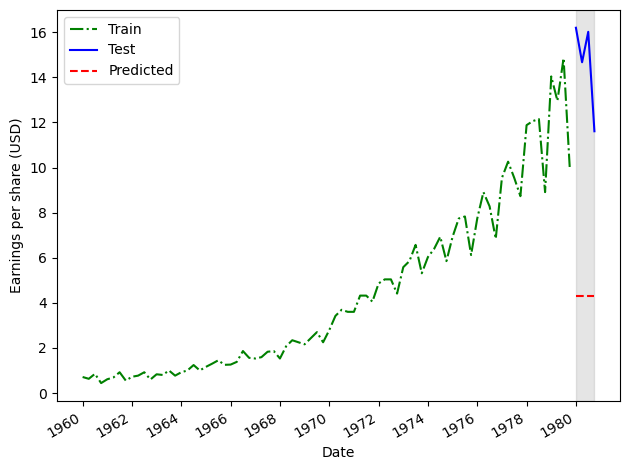

In [17]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots()
 
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
 
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
 
fig.autofmt_xdate()
plt.tight_layout()

In [20]:
last_year_mean = np.mean(train.data[-4:])
 
print(last_year_mean)

12.96


In [21]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

/var/folders/bb/2qsf8cm95jg05zrms2_8m2qr0000gn/T/ipykernel_67950/1649473344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


15.5963680725103


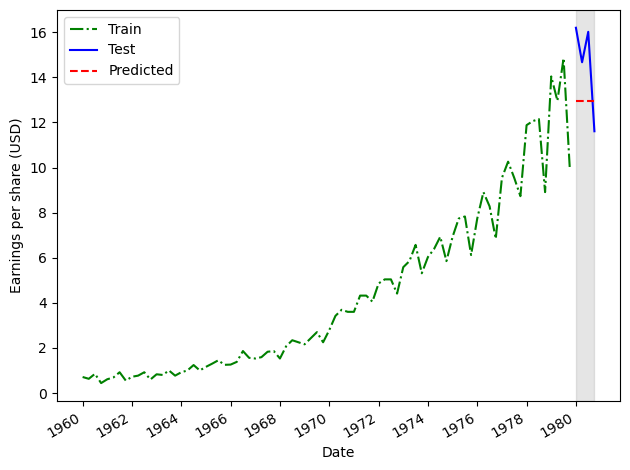

In [23]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
print(mape_last_year_mean)

fig, ax = plt.subplots()
 
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
 
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
 
fig.autofmt_xdate()
plt.tight_layout()

#### We can learn from this baseline that future values likely depend on past values that are not too far back in history. This is a sign of autocorrelation, and we will dive deep into this subject in chapter 5. For now, let’s look at another baseline that we could develop for this situation.